# Decision Tree for categorical target

In [55]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

In [7]:
pima = pd.read_csv("data/diabetes.csv", dtype=str)


In [10]:
pima['pregnant'] = pima['pregnant'].astype(float)
pima['glucose'] = pima['glucose'].astype(float)
pima['bp'] = pima['bp'].astype(float)
pima['skin'] = pima['skin'].astype(float)
pima['insulin'] = pima['insulin'].astype(float)
pima['bmi'] = pima['bmi'].astype(float)
pima['pedigree'] = pima['pedigree'].astype(float)
pima['age'] = pima['age'].astype(float)
pima['label'] = pima['label'].astype(float)

Feature Selection

In [62]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


In [63]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [64]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


Evaluating Model


In [65]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


## Optimizing Decision Tree Performance
criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [66]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


Visualizing Decision Trees

In [67]:
from sklearn import tree

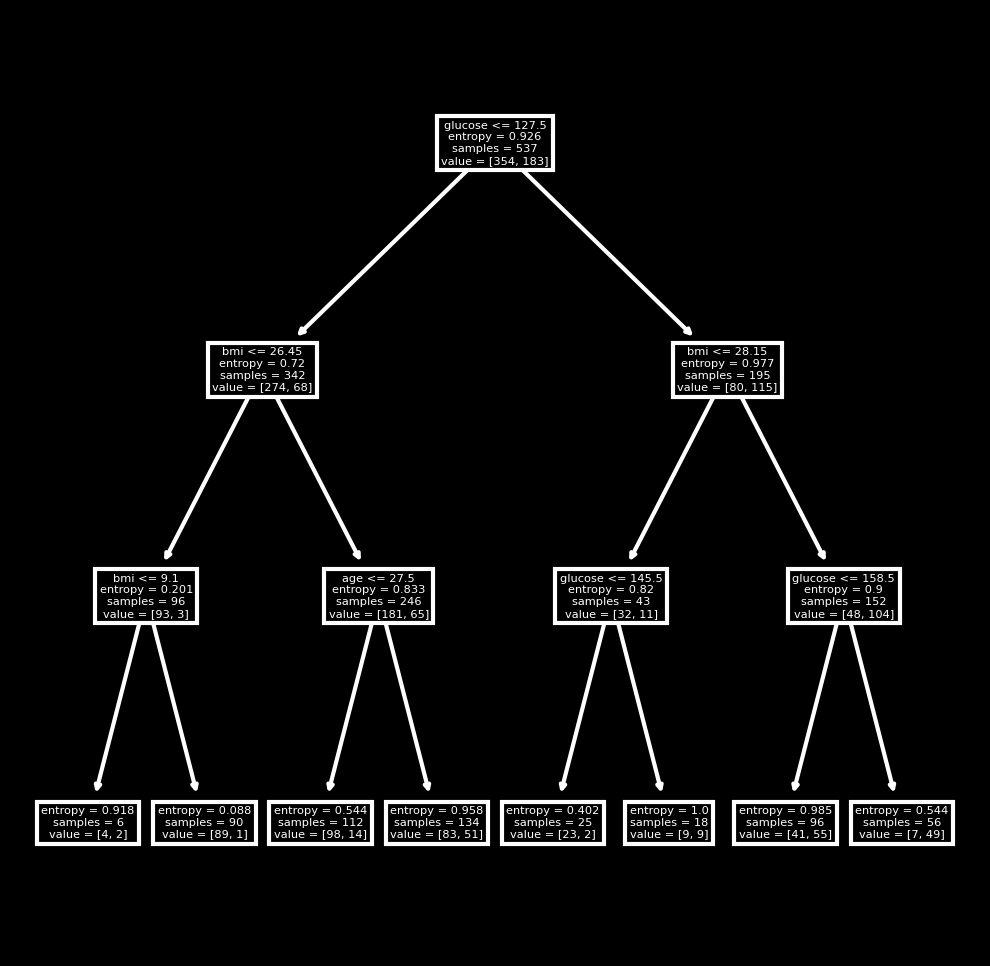

In [68]:
fn = X_train.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
                feature_names = fn )
                
fig.savefig('imagename.png')

# Regressiont Tree for continuos target

In [82]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error

In [84]:
beer = pd.read_csv("data/beer_consumption.csv", dtype=str)

In [86]:
beer['average_temperature']= beer['average_temperature'].astype(float)
beer['minimum_temperature']= beer['maximum_temperature'].astype(float)
beer['maximum_temperature']= beer['maximum_temperature'].astype(float)
beer['rainfall_mm']= beer['rainfall_mm'].astype(float)
beer['weekend']= beer['weekend'].astype(int)
beer['beer_consumption_liters']= beer['beer_consumption_liters'].astype(float)

In [87]:
beer.head()

,date,average_temperature,minimum_temperature,maximum_temperature,rainfall_mm,weekend,beer_consumption_liters
0,1/1/2015,27.30,32.5,32.5,0.0,0,25.461
1,1/2/2015,27.02,33.5,33.5,0.0,0,28.972
2,1/3/2015,24.82,29.9,29.9,0.0,1,30.814
3,1/4/2015,23.98,28.6,28.6,1.2,1,29.799
4,1/5/2015,23.82,28.3,28.3,0.0,0,28.900


In [88]:
x = beer.drop(columns=['date', 'beer_consumption_liters'])
y = beer[['beer_consumption_liters']]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [90]:
model = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,)
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [91]:
#DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
#                      max_features=None, max_leaf_nodes=None,
#                      min_impurity_decrease=0.0, min_impurity_split=None,
#                      min_samples_leaf=1, min_samples_split=2,
#                      min_weight_fraction_leaf=0.0, presort='deprecated',
#                      random_state=None, splitter='best') 

In [92]:
score = model.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 1.0


In [93]:
predictions = model.predict(X_test) 

mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2)) 

# MSE good is close to zero, 
# RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately

MSE:  11.12167459090909
RMSE:  3.3349174788754654


In [94]:
mean_absolute_percentage_error(y_test, predictions)
# MAPE good is close to zero, 

0.10491145926938439

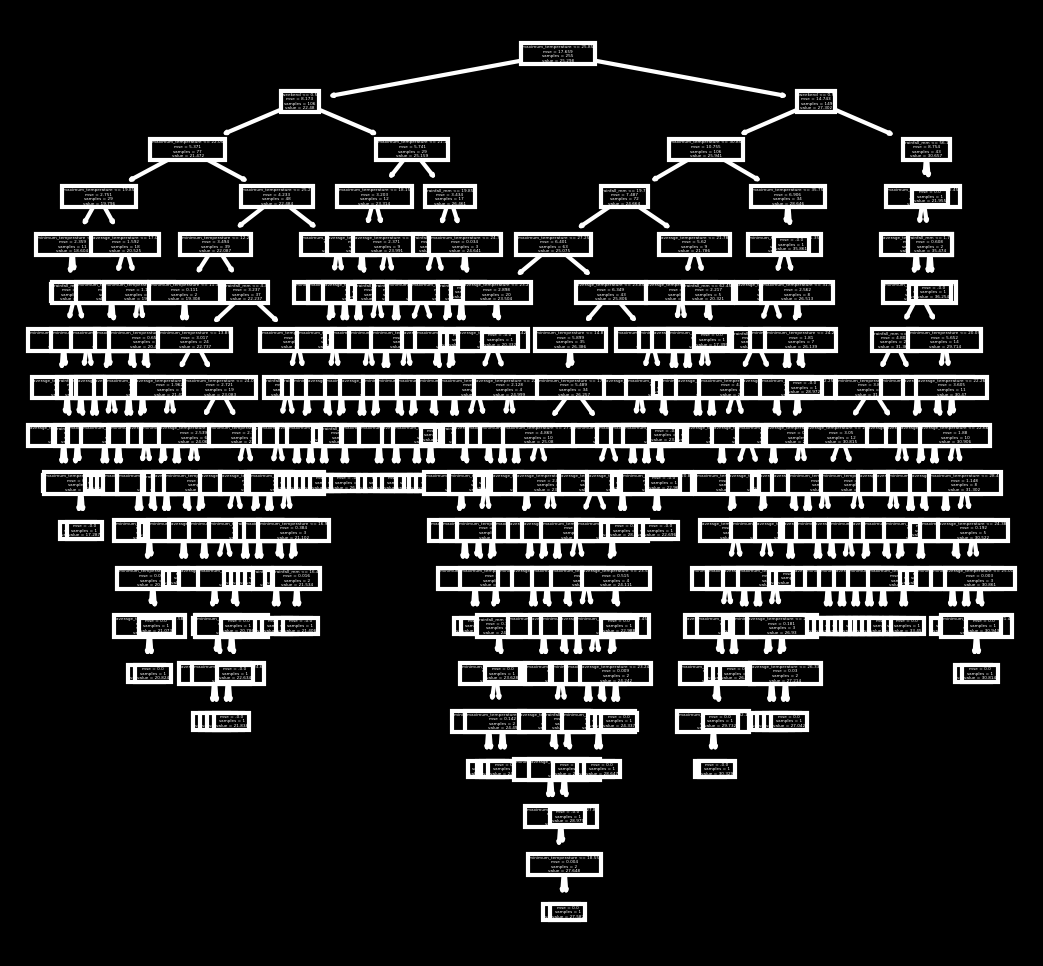

In [54]:
fn = X_train.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
                feature_names = fn )
                
fig.savefig('imagename.png')

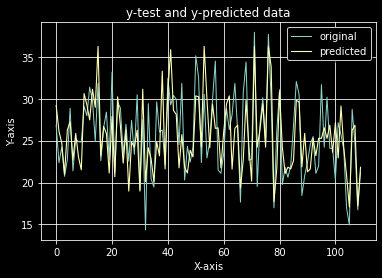

In [95]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, predictions, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [96]:
# https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
# https://www.datatechnotes.com/2020/10/regression-example-with-decisiontreeregressor.html